In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from config import weather_api_key
from datetime import datetime
import time
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call + API Key variable
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)

In [3]:
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-90, 90, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [7]:
#Create a list for storing the data we pull
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval")
print("-----------------------------")

#Create the counters
record_count = 1
set_count = 1

Beginning Data Retrieval
-----------------------------


In [8]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | qasigiannguit
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | namibe
Processing Record 4 of Set 1 | killybegs
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | lively
Processing Record 7 of Set 1 | port hawkesbury
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | stornoway
Processing Record 12 of Set 1 | urumqi
Processing Record 13 of Set 1 | karasuk
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | tazovskiy
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | narsaq
Processing Record 18 of Set 1 | umm lajj
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | mahebourg
Processing Record 23 of Set 1 | ushuaia
Processing Record

Processing Record 37 of Set 4 | tromso
Processing Record 38 of Set 4 | monrovia
Processing Record 39 of Set 4 | souillac
Processing Record 40 of Set 4 | malanje
Processing Record 41 of Set 4 | hofn
Processing Record 42 of Set 4 | ippy
Processing Record 43 of Set 4 | matara
Processing Record 44 of Set 4 | kalemie
Processing Record 45 of Set 4 | sakakah
Processing Record 46 of Set 4 | lesmahagow
Processing Record 47 of Set 4 | santa cruz
Processing Record 48 of Set 4 | panaba
Processing Record 49 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 50 of Set 4 | methoni
Processing Record 1 of Set 5 | riberalta
Processing Record 2 of Set 5 | havelock
Processing Record 3 of Set 5 | kavaratti
Processing Record 4 of Set 5 | nefteyugansk
Processing Record 5 of Set 5 | zlatarica
City not found. Skipping...
Processing Record 6 of Set 5 | ilam
Processing Record 7 of Set 5 | kulhudhuffushi
Processing Record 8 of Set 5 | karur
Processing Record 9 of Set 5 | sao filipe
Pr

Processing Record 27 of Set 8 | abu dhabi
Processing Record 28 of Set 8 | salaga
Processing Record 29 of Set 8 | mitsamiouli
Processing Record 30 of Set 8 | salalah
Processing Record 31 of Set 8 | paamiut
Processing Record 32 of Set 8 | henties bay
Processing Record 33 of Set 8 | abu zabad
Processing Record 34 of Set 8 | rock sound
Processing Record 35 of Set 8 | linhares
Processing Record 36 of Set 8 | tarko-sale
Processing Record 37 of Set 8 | ust-ishim
Processing Record 38 of Set 8 | kargasok
Processing Record 39 of Set 8 | mayumba
Processing Record 40 of Set 8 | san francisco
Processing Record 41 of Set 8 | aubenas
Processing Record 42 of Set 8 | para de minas
Processing Record 43 of Set 8 | obera
Processing Record 44 of Set 8 | mavrovi anovi
Processing Record 45 of Set 8 | dharangaon
Processing Record 46 of Set 8 | erbaa
Processing Record 47 of Set 8 | barranca
Processing Record 48 of Set 8 | talnakh
Processing Record 49 of Set 8 | santa isabel do rio negro
Processing Record 50 of

City not found. Skipping...
Processing Record 15 of Set 12 | bumba
Processing Record 16 of Set 12 | surt
Processing Record 17 of Set 12 | naifaru
Processing Record 18 of Set 12 | comodoro rivadavia
Processing Record 19 of Set 12 | digri
Processing Record 20 of Set 12 | dolores
Processing Record 21 of Set 12 | harper
Processing Record 22 of Set 12 | lakhdenpokhya
Processing Record 23 of Set 12 | zambrow
Processing Record 24 of Set 12 | selma
Processing Record 25 of Set 12 | shetpe
Processing Record 26 of Set 12 | sorvag
City not found. Skipping...
Processing Record 27 of Set 12 | pirganj
Processing Record 28 of Set 12 | kribi
Processing Record 29 of Set 12 | zwedru
Processing Record 30 of Set 12 | mikkeli
Processing Record 31 of Set 12 | tokmak
Processing Record 32 of Set 12 | pimenta bueno
Processing Record 33 of Set 12 | hyeres
Processing Record 34 of Set 12 | oktyabrskiy
Processing Record 35 of Set 12 | holme
Processing Record 36 of Set 12 | wuustwezel
Processing Record 37 of Set 12 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qasigiannguit,68.82,-51.19,42.80,80,0,1.66,GL,2020-08-24 00:15:42
1,Tasiilaq,65.61,-37.64,37.40,100,0,1.12,GL,2020-08-24 00:15:42
2,Namibe,-15.20,12.15,64.18,90,50,1.79,AO,2020-08-24 00:15:42
3,Killybegs,54.63,-8.45,51.01,95,1,1.90,IE,2020-08-24 00:15:42
4,Cape Town,-33.93,18.42,59.00,93,40,8.05,ZA,2020-08-24 00:11:52
5,Lively,46.43,-81.15,70.00,100,90,10.29,CA,2020-08-24 00:15:43
6,Port Hawkesbury,45.62,-61.35,69.80,60,75,4.70,CA,2020-08-24 00:15:43
7,Ilulissat,69.22,-51.10,42.80,75,0,3.51,GL,2020-08-24 00:15:43
8,Bredasdorp,-34.53,20.04,55.40,93,100,2.24,ZA,2020-08-24 00:15:43
9,Stornoway,58.21,-6.39,45.00,87,45,3.98,GB,2020-08-24 00:15:44


In [10]:
column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df =city_data_df[column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qasigiannguit,GL,2020-08-24 00:15:42,68.82,-51.19,42.80,80,0,1.66
1,Tasiilaq,GL,2020-08-24 00:15:42,65.61,-37.64,37.40,100,0,1.12
2,Namibe,AO,2020-08-24 00:15:42,-15.20,12.15,64.18,90,50,1.79
3,Killybegs,IE,2020-08-24 00:15:42,54.63,-8.45,51.01,95,1,1.90
4,Cape Town,ZA,2020-08-24 00:11:52,-33.93,18.42,59.00,93,40,8.05
...,...,...,...,...,...,...,...,...,...
532,Hyeres,FR,2020-08-24 00:19:53,43.12,6.12,73.40,40,53,5.82
533,Oktyabrskiy,RU,2020-08-24 00:14:58,54.48,53.47,52.72,89,0,2.28
534,Holme,DK,2020-08-24 00:19:53,56.11,10.17,57.20,82,83,11.41
535,Wuustwezel,BE,2020-08-24 00:19:53,51.39,4.59,63.00,82,90,10.29


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

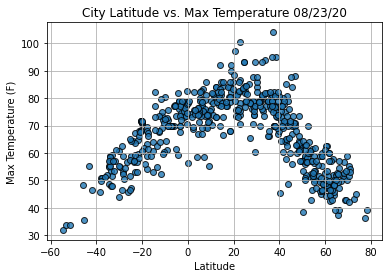

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

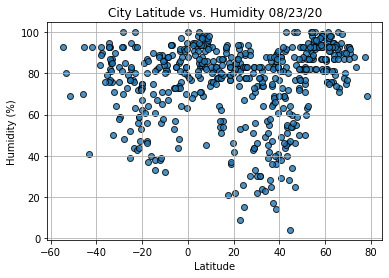

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

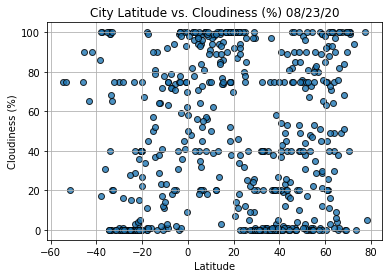

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

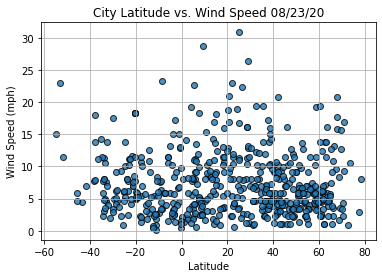

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [79]:
# Create a function for linear regression on weather data and plot a regression line and equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
        # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.title(title)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [80]:
#loc method to pull all data associated with an index number
#change the[13] to different index numbers to pull different city info
index13 = city_data_df.loc[13]
index13

City                    Tazovskiy
Country                        RU
Date          2020-08-24 00:15:45
Lat                         67.47
Lng                          78.7
Max Temp                    52.16
Humidity                       99
Cloudiness                    100
Wind Speed                    9.6
Name: 13, dtype: object

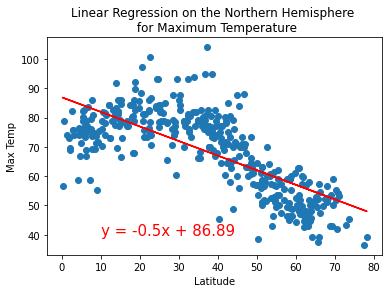

In [83]:
#loc to filter the dataframe by the Lat column for >=0
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

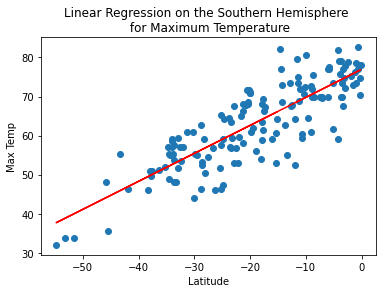

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

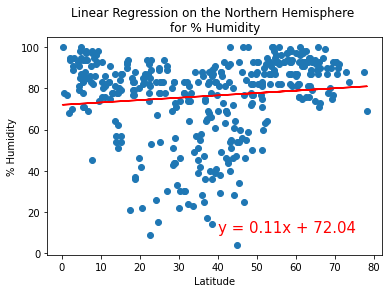

In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n'
                        'for % Humidity', '% Humidity',(40,10))

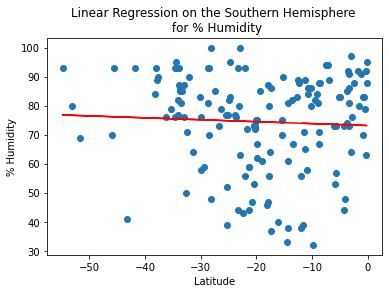

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

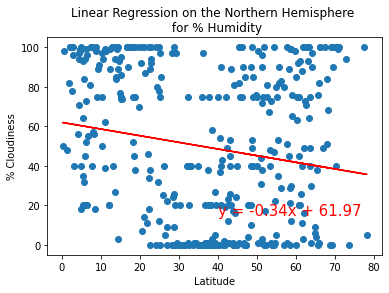

In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Cloudiness',(40,15))

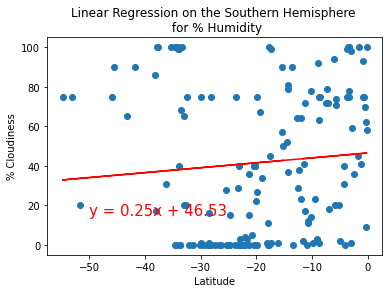

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Cloudiness',(-50,15))

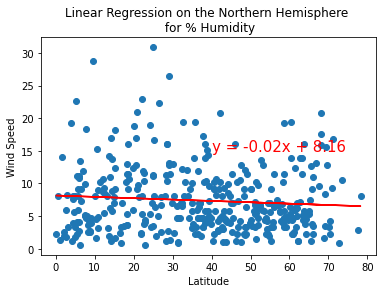

In [93]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 'Wind Speed',(40,15))

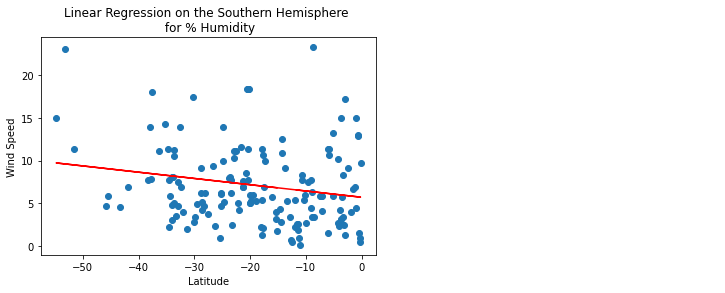

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 'Wind Speed',(40,15))